***Insurance Claims DataSet***

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [665]:
import csv
import os
import glob
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [668]:
claim = pd.read_csv('./Insurance Claims Casestudy/claims.csv')
demo = pd.read_csv('./Insurance Claims Casestudy/cust_demographics.csv')

In [669]:
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [670]:
demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [671]:
# Combine the two datasets using merge fun()
claim_demo = pd.merge(right = claim,left = demo, right_on = "customer_id", left_on = "CUST_ID",how = "inner")

#drop the column customer_id which is no longer use
claim_demo.drop(columns = ["customer_id"], inplace = True)
claim_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [672]:
claim_demo.shape

(1085, 15)

#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [673]:
claim_demo['DateOfBirth'] = pd.to_datetime(claim_demo['DateOfBirth'],format='%d-%b-%y')

claim_demo['claim_date'] = pd.to_datetime(claim_demo['claim_date'],format='%m/%d/%Y')

claim_demo["Contact"] = pd.to_numeric(claim_demo.Contact.str.replace("-",""),downcast='float')

#### Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [674]:
claim_demo["claim_amount"] = pd.to_numeric(claim_demo.claim_amount.str.replace("$",""),downcast='float')

<ipython-input-674-a8505f166d89>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  claim_demo["claim_amount"] = pd.to_numeric(claim_demo.claim_amount.str.replace("$",""),downcast='float')


In [675]:
claim_demo.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [676]:
claim_demo["FLAG"] = where(claim_demo.police_report == "No", 0 ,
                     where(claim_demo.police_report == "Yes", 1,np.nan))

In [677]:
claim_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0
1083,11256802,Female,2064-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0


#### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column

In [680]:
claim_demo = claim_demo.groupby('CUST_ID').first().reset_index(drop=True)

In [681]:
claim_demo

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Male,2065-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0.0
1067,Female,2066-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,1.0
1068,Female,2063-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0.0
1069,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0.0


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [682]:
# Check for missing values in incident cause since that field contain ambiguity.
claim_demo['incident_cause'].isna().sum()

0

In [683]:
claim_demo.isnull().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
FLAG                   292
dtype: int64

In [693]:
claim_demo["claim_amount"].fillna((claim_demo.claim_amount.mean()), inplace = True)
claim_demo["total_policy_claims"].fillna((claim_demo.total_policy_claims.mean()), inplace = True)
claim_demo["FLAG"].fillna((claim_demo.FLAG.mean()), inplace = True)

In [694]:
claim_demo.isnull().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
FLAG                   0
Cust_Age               0
Age_Group              0
dtype: int64

In [695]:
categorical_field = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","FLAG"]
continuous_field = ["claim_amount"]

In [696]:
for i in categorical_field:
    claim_demo[i] = claim_demo[i].fillna(claim_demo[i].mode())
claim_demo[continuous_field] = claim_demo[continuous_field].fillna(claim_demo[continuous_field].mean())

In [697]:
claim_demo

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG,Cust_Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12504.564453,1.0,Yes,0.000000,40,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.000000,46,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.214377,29,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.000000,47,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.000000,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Male,2065-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.000000,-47,Children
1067,Female,2066-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1.000000,-48,Children
1068,Female,2063-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.000000,-45,Children
1069,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.000000,22,Youth


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18,  Youth 18-30,  Adult 30-60,  Senior > 60

In [698]:
claim_demo["Cust_Age"] = (claim_demo.claim_date.dt.year - claim_demo.DateOfBirth.dt.year)
claim_demo.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG,Cust_Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12504.564453,1.0,Yes,0.000000,40,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.000000,46,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.214377,29,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.000000,47,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.000000,38,Adult


In [699]:
claim_demo["Age_Group"] = where(claim_demo.Cust_Age < 18, "Children",
                            where(claim_demo.Cust_Age < 30, "Youth",
                             where(claim_demo.Cust_Age < 60, "Adult",
                              where(claim_demo.Cust_Age < 100, "Senior", "NaN"))))
claim_demo["Age_Group"] = claim_demo["Age_Group"].fillna(claim_demo["Age_Group"].mode())
claim_demo.groupby("Age_Group").count()

claim_demo.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG,Cust_Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12504.564453,1.0,Yes,0.000000,40,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.000000,46,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.214377,29,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.000000,47,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.000000,38,Adult


#### 8. What is the average amount claimed by the customers from various segments?

In [700]:
claim_demo.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12772.634766
Platinum,12399.166992
Silver,12328.863281


#### 9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.

In [701]:
claim_demo[claim_demo.claim_date < '09/10/2018'].groupby(claim_demo.incident_cause)['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.219528e+05
1,Driver error,3.260185e+06
2,Natural causes,1.311333e+06
3,Other causes,3.723206e+06
4,Other driver error,3.277573e+06


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [702]:
claim_demo.loc[(claim_demo.incident_cause.str.lower().str.contains("driver") & (claim_demo.Age_Group=='Adult')
& ((claim_demo.State == "TX") | (claim_demo.State == "DE") | (claim_demo.State == "AK"))),:]['Age_Group'].count()

16

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


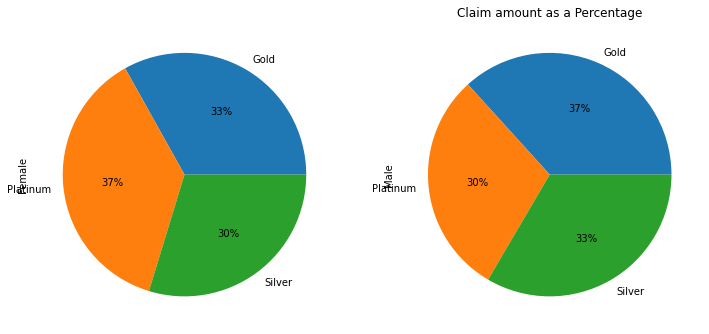

In [705]:
aggrigated_val = claim_demo.groupby(['gender', 'Segment'])['claim_amount'].sum().reset_index()

pie = aggrigated_val.pivot(index = "Segment", columns = "gender", values = "claim_amount")

pie.plot(kind = "pie", subplots = True, legend = False, figsize = (12,8), autopct='%1.0f%%')
plt.title('Claim amount as a Percentage')
plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [722]:
most_type_claimed = claim_demo.loc[claim_demo.incident_cause.str.lower().str.contains("driver")
                                  ].groupby(by = 'gender')[["gender"]].count().reset_index(drop=True)

most_type_claimed

,gender
0,220
1,277


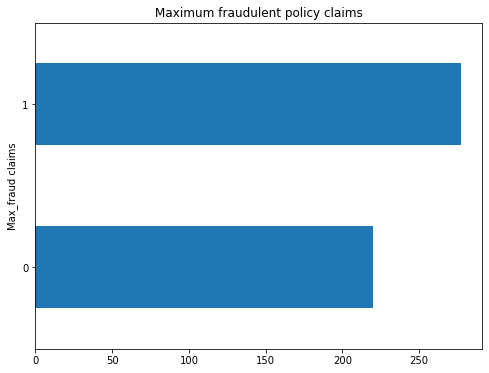

In [726]:
most_type_claimed.plot(kind = 'barh', subplots = True, legend = False, figsize = (8,6))
plt.ylabel('Max_fraud claims')
plt.title('Maximum fraudulent policy claims')
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [727]:
Max_fraudulent = claim_demo.groupby('Age_Group')[['fraudulent']].count()
Max_fraudulent

,fraudulent
Age_Group,
Adult,505
Children,245
Youth,321


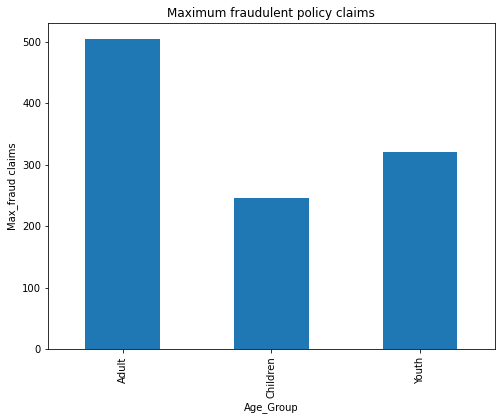

In [728]:
Max_fraudulent.plot(kind = 'bar', subplots = True, legend = False, figsize = (8,6))
plt.ylabel('Max_fraud claims')
plt.title('Maximum fraudulent policy claims')
plt.show()

####  14.Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [731]:
claim_demo['Month'] = claim_demo['claim_date'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
claim_demo['Year'] = claim_demo['claim_date'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))
claim_demo['Monthly_Trend'] = claim_demo['claim_date'].apply(lambda x: pd.Timestamp.strftime(x,format="%m"))

claim_demo.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,FLAG,Cust_Age,Age_Group,Month,Year,Monthly_Trend
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12504.564453,1.0,Yes,0.000000,40,Adult,April,2018,04
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.000000,46,Adult,April,2018,04
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.214377,29,Youth,October,2017,10
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.000000,47,Adult,March,2018,03
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.000000,38,Adult,July,2018,07


In [732]:
Monthly_Trend_data = pd.DataFrame(claim_demo.groupby(['Month', 'Year', 'Monthly_Trend'])['claim_amount'].sum())

Monthly_Trend_data = Monthly_Trend_data.reset_index(level='Monthly_Trend')

<Figure size 1080x576 with 0 Axes>

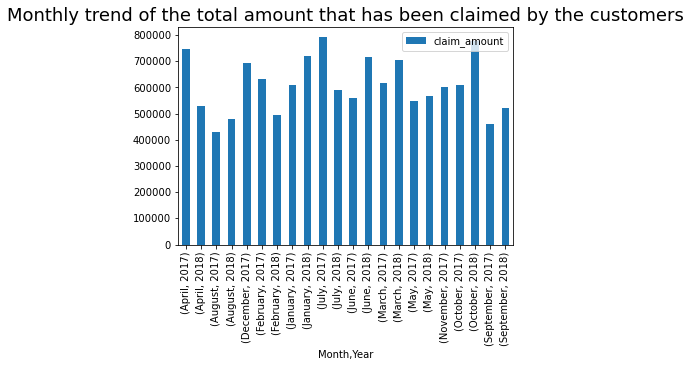

In [741]:
plt.figure(figsize=(15,8))
Monthly_Trend_data.plot(kind='bar', fontsize=10)
plt.title("Monthly trend of the total amount that has been claimed by the customers", fontsize=18)
plt.show()

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


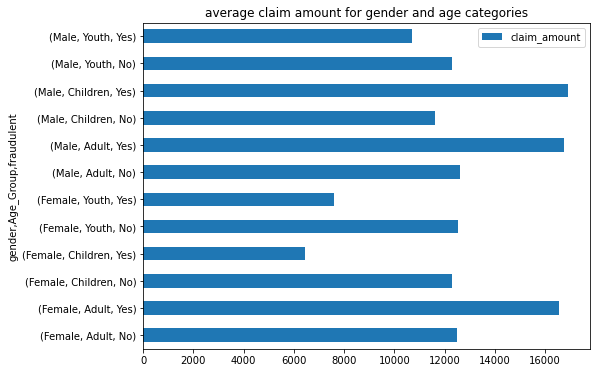

In [742]:
Avg_claim_amt = claim_demo.groupby(['gender','Age_Group','fraudulent'])[['claim_amount']].mean()

Avg_claim_amt.plot(kind='barh', figsize = (8,6))
plt.title('average claim amount for gender and age categories')
plt.show()

Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements.

#### 16. Is there any similarity in the amount claimed by males and females?

In [743]:
import scipy.stats as stats

In [ ]:
male = claim_demo[claim_demo.gender=="Male"]

female = claim_demo[claim_demo.gender=="Female"]

In [744]:
stats.ttest_ind(male.claim_amount,female.claim_amount)

Ttest_indResult(statistic=0.884820659484728, pvalue=0.3764497634508194)

`Conclusion : P-Value <= 0.05 then we can't reject NULL Hypothesis & so we accept Alternative Hypothesis.`

#### 17. Is there any relationship between age category and segment?


In [746]:
Chi_square_test = pd.crosstab(claim_demo.Age_Group,claim_demo.Segment)

In [748]:
stats.chi2_contingency(Chi_square_test)

(2.5646432580104515,
 0.6330990159452269,
 4,
 array([[173.04855275, 169.74789916, 162.20354809],
        [ 83.95424837,  82.35294118,  78.69281046],
        [109.99719888, 107.89915966, 103.10364146]]))

`Conclusion : P-Value <= 0.05 then we can't reject NULL Hypothesis & so we accept Alternative Hypothesis.`

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

#### 19. Is there any difference between age groups and insurance claims?

In [751]:
diff_ageGrp_claim = pd.crosstab(claim_demo.Age_Group,claim_demo.claim_type)
stats.chi2_contingency(diff_ageGrp_claim)

(13.066067401557198,
 0.010957448143522707,
 4,
 array([[ 90.53221289, 111.27917834, 303.18860878],
        [ 43.92156863,  53.9869281 , 147.09150327],
        [ 57.54621849,  70.73389356, 192.71988796]]))

`Conclusion : P-Value <= 0.05 then we can't reject NULL Hypothesis & so we accept Alternative Hypothesis.`

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [760]:
stats.pearsonr(claim_demo.total_policy_claims,claim_demo.claim_amount)

(-0.018774826659022775, 0.5393712039667039)

`Conclusion : P-Value <= 0.05 then we can't reject NULL Hypothesis & so we accept Alternative Hypothesis.`